分析customer不同维度的特点，分类达到精准营销。

I. 用户画像 - 增大LTV (Life-Time-Value)

//客户从一开始到最后离开，数据visiable（具体购买）/invisable（使用后social media贴图），
// #hashtag click Inquersion可以换成visiable 商业指标。

作用（6步骤）：

1.准确营销

2. 用户收集与统计

3. 数据挖掘 - 聚类算法分析 //Machine Learning 花钱额度对应不同category  再营销，促销

4. 效果评估  //给评估A/B 促销效果统计分析。

5. 产品私人订制 //不同组不同商品

6. 竞争分析  //对手供应商 提供更有效的促销赢得客户的taste口味

II. 构建流程：
（1）基础数据收集 ：

基础数据收集 
->>网络行为（e.g.点击，click rate，浏览时间最后买)
->>服务内行为（买了手机登录store买其他软件产品，存储了多少照片，实时定位,hashtag贴图）
->>用户内容偏好（用软件订旅途）
->>用户交易（关联产品提供品牌竞争力更强）

行为建模 （文本挖掘，自然语言处理，机器学习</font>，预测算法，<font color = 'red'>聚类算法``</font>）

构建画像 （基本属性，<font color = 'red'>购买能力</font>，行为特征，兴趣爱好，心理特征，社交网络）

III. RFM 模型的意义
Recency： 最后一次消费时间与当前时间的间隔

Frequency： 三个月购票次数

Monetary： 三个月支付总金额

IV. RFM Level 等级制度
R,F,M 都分为五级 来比较消费者在级别区间的变动，更能显现出相对行为

一般来说企业用r和f的变化，来预测用户消费的异常动态，根据客户流失的可能性加上这些用户的m（monetary）的角度来分析，就可以把重点放在贡献度高且流失机会也高的用户上，重点拜访或联系，以最有效的方法晚会挽回流失用户

In [2]:
# "rfm" data frame
#rfm_data_customer <- read.csv("/Users/junduo/Desktop/桌面/BA1802/E_Commerce/customer_RFM.csv", header = TRUE)
#install.packages("rfm")
library(rfm)
head(rfm_data_customer,2)
head(rfm_data_orders,2)

customer_id,revenue,most_recent_visit,number_of_orders,recency_days
22086,777,2006-05-14,9,232
2290,1555,2006-09-08,16,115


customer_id,order_date,revenue
Mr. Brion Stark Sr.,2004-12-20,32
Ethyl Botsford,2005-05-02,36


In [3]:
#show data type of  rfm_data_orders
str(rfm_data_orders)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	4906 obs. of  3 variables:
 $ customer_id: chr  "Mr. Brion Stark Sr." "Ethyl Botsford" "Hosteen Jacobi" "Mr. Edw Frami" ...
 $ order_date : Date, format: "2004-12-20" "2005-05-02" ...
 $ revenue    : num  32 36 116 99 76 56 108 183 30 13 ...


In [4]:
#define a varaible for current date to find recency
analysis_date <- lubridate::as_date('2006-12-31', tz = 'UTC')

In [5]:
#define fine bins for RFM with above data
rfm_result <- rfm_table_order(data = rfm_data_orders,
                              customer_id = customer_id, 
                              order_date = order_date,
                              revenue = revenue, 
                              analysis_date = analysis_date,
                              recency_bins = 5,
                              frequency_bins = 5,
                              monetary_bins = 5)

In [6]:
head(rfm_result$rfm,2)

customer_id,date_most_recent,recency_days,transaction_count,amount,recency_score,frequency_score,monetary_score,rfm_score
Abbey O'Reilly DVM,2006-06-09,205,6,472,3,4,3,343
Add Senger,2006-08-13,140,3,340,4,1,2,412


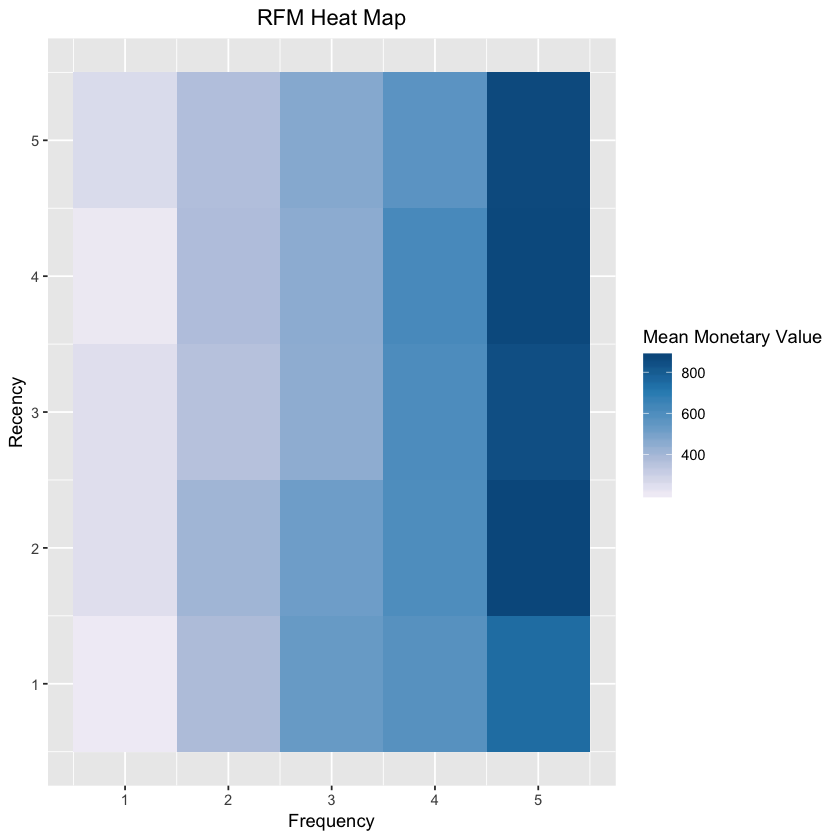

In [7]:
# Heat Map
rfm_heatmap(rfm_result)

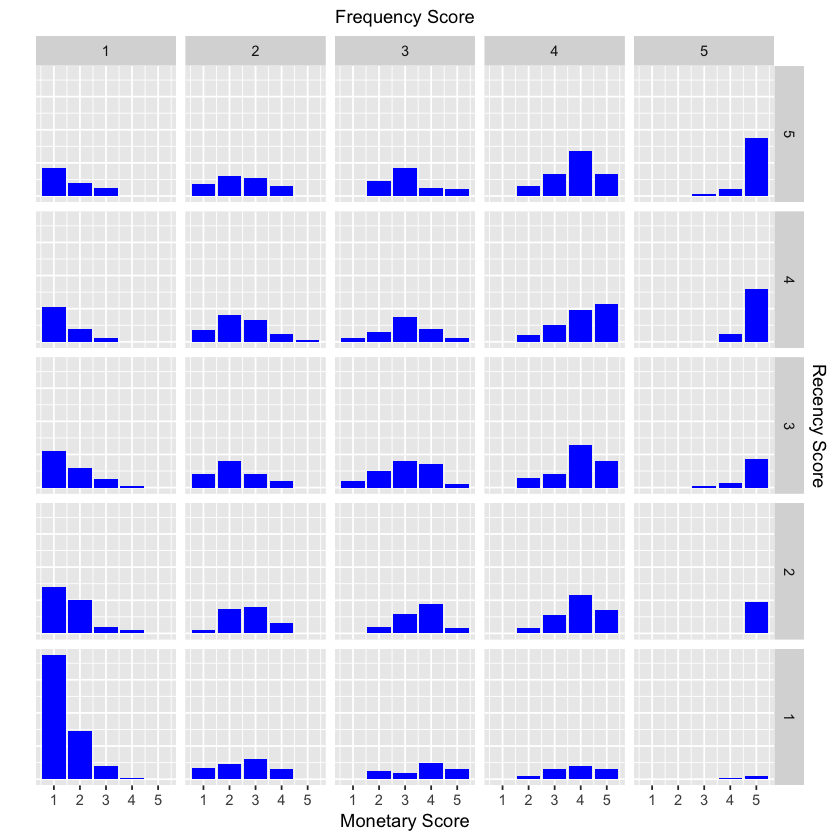

In [8]:
# Bar Chart
rfm_bar_chart(rfm_result)
#Recency =1 all money goes to Frequency =1

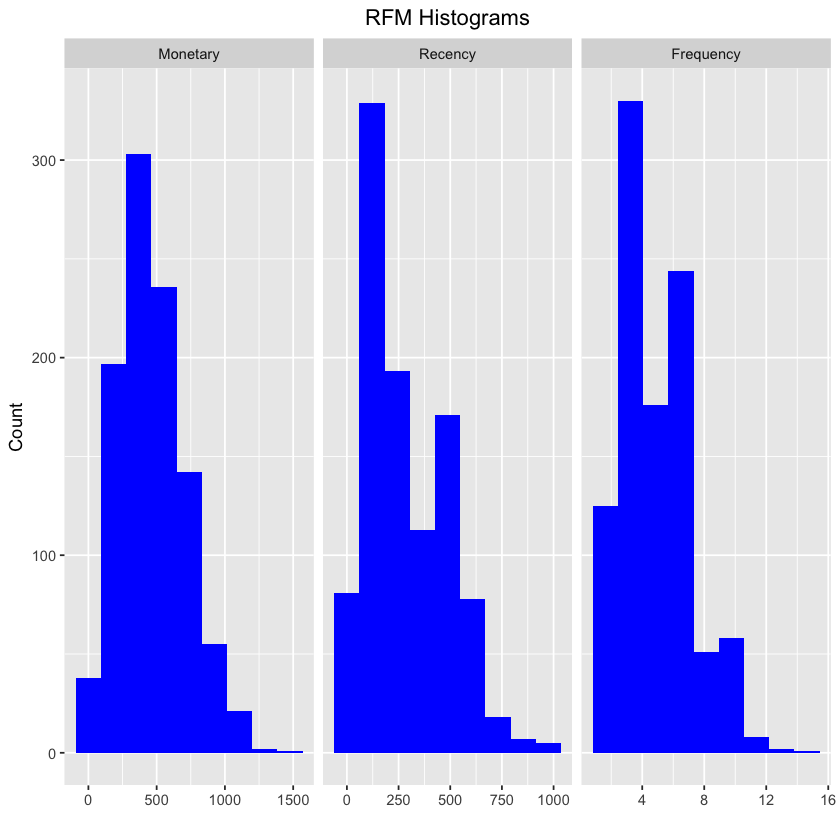

In [9]:
# Histogram 分布
rfm_histograms(rfm_result)

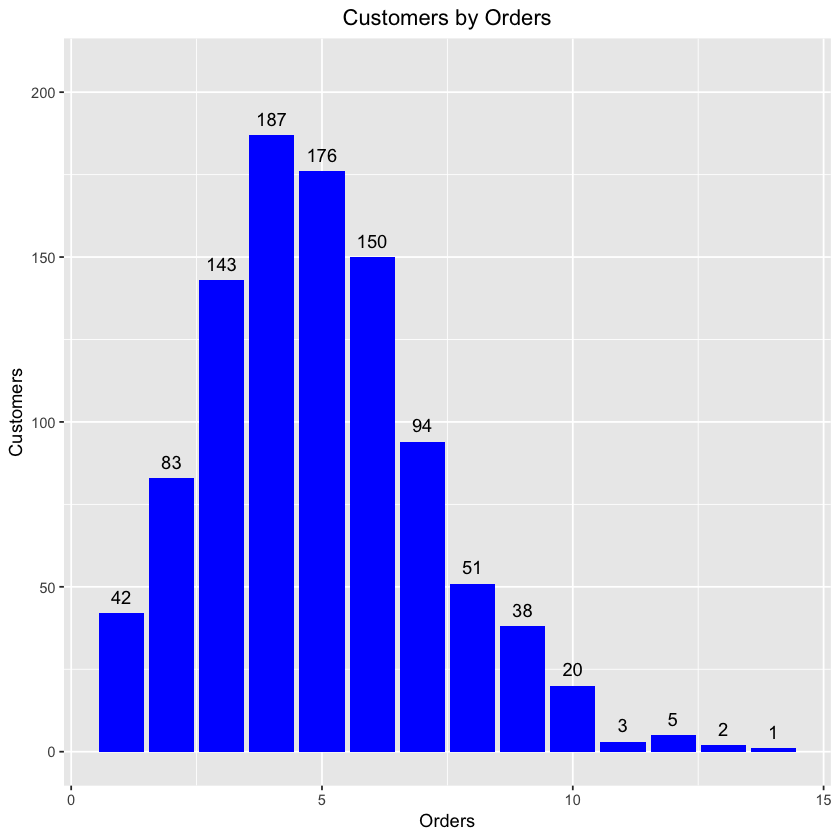

In [10]:
# Customers by Orders
rfm_order_dist(rfm_result)

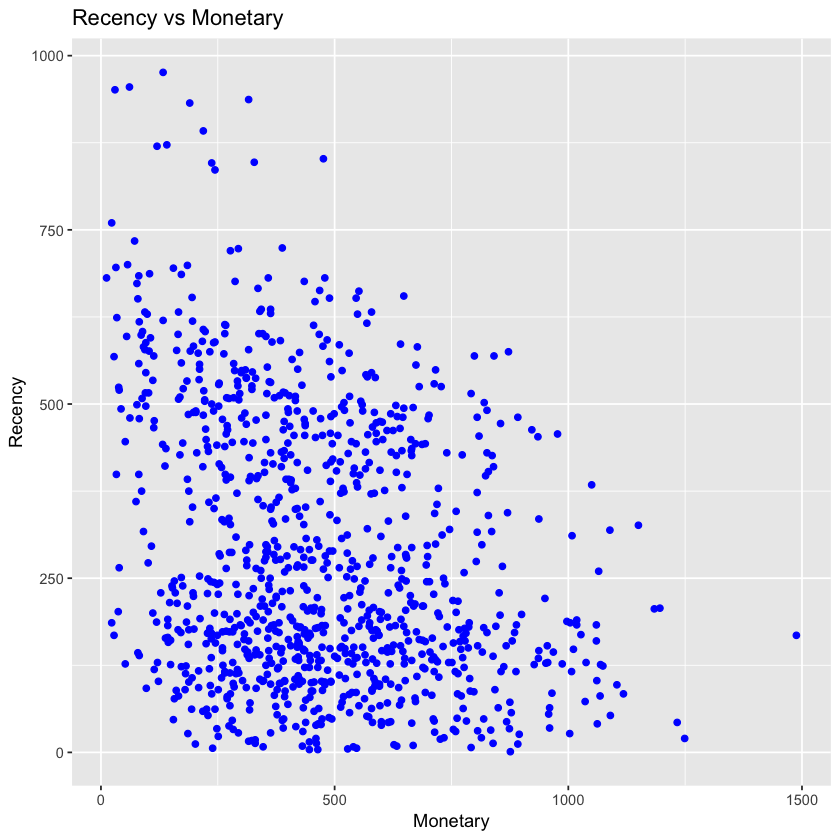

In [11]:
# Scatter Plot (Monetary vs Recency)
rfm_rm_plot(rfm_result)

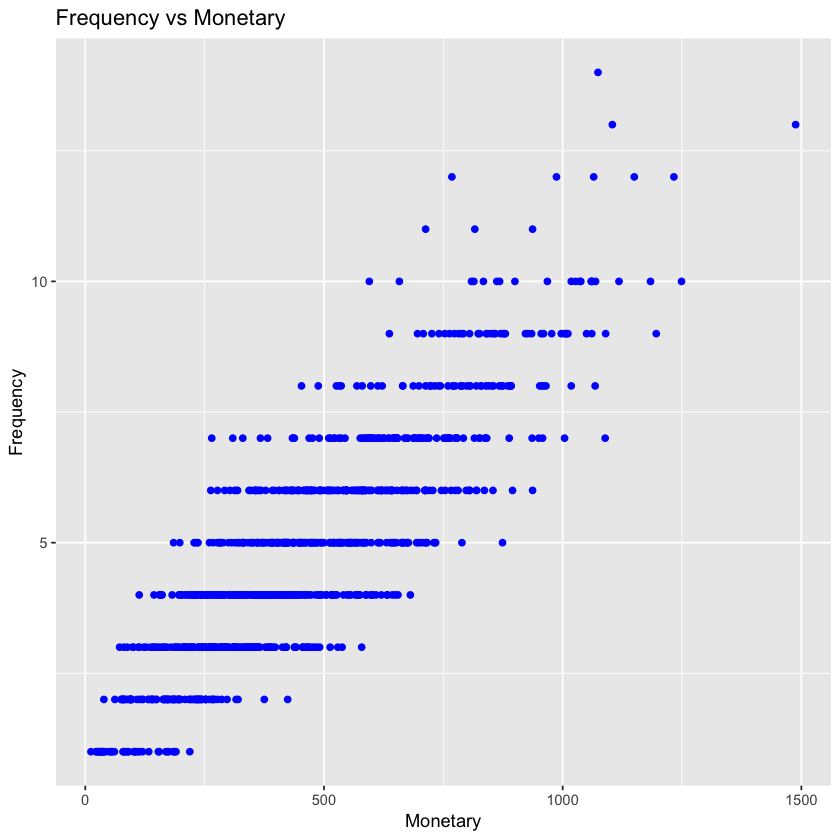

In [12]:
# Scatter Plot (Monetary vs Frequency)
rfm_fm_plot(rfm_result)

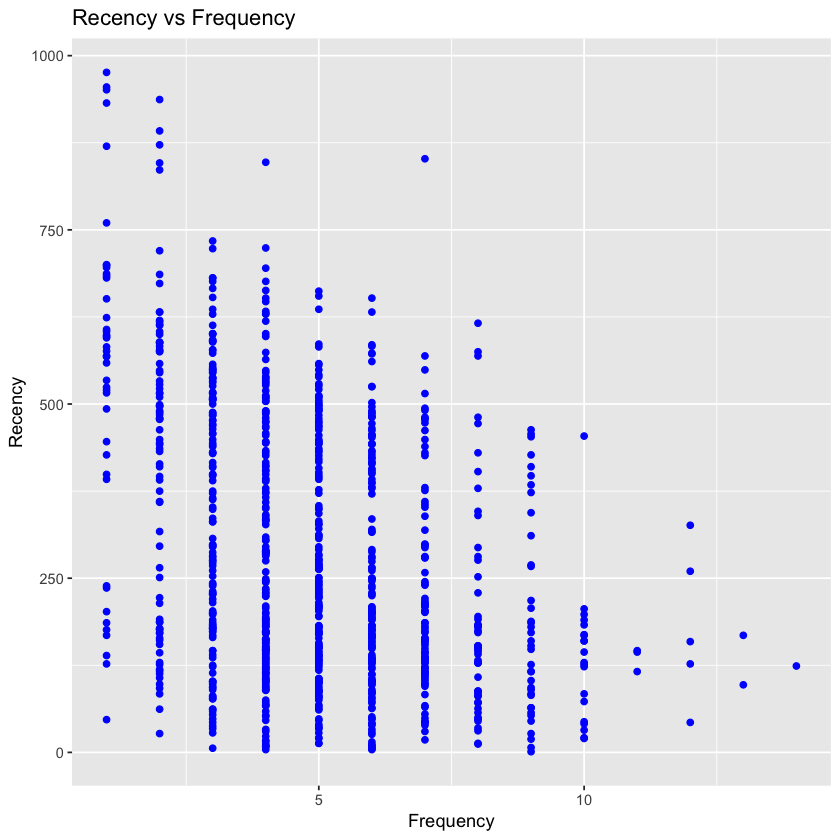

In [13]:
# Scatter Plot (Recency vs Frequency)
rfm_rf_plot(rfm_result)

In [14]:
# Convert Data Frame & Normalizaing column with Scale
rfm_result2 <- rfm_result$rfm
rfm_result2_scale <- scale(rfm_result2[,-c(1:5)])

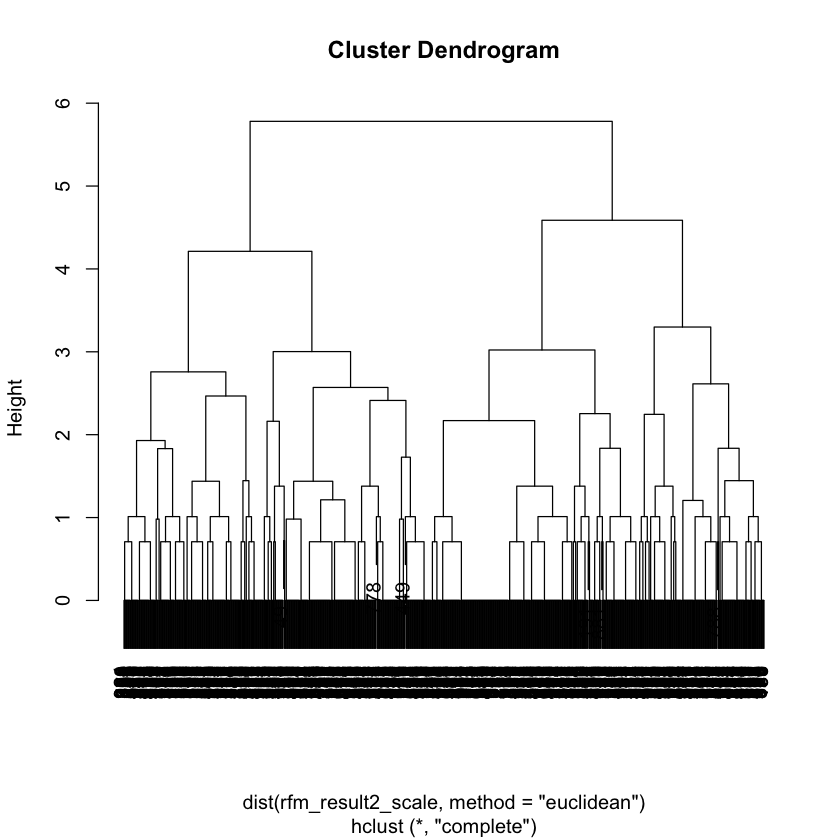

In [15]:
## Hierarchical Cluster Analysis ##
hc <- hclust(dist(rfm_result2_scale, method = "euclidean"))
plot(hc)

In [16]:
# Determine number of clusters
hc_cluster <- cutree(hc,8)
head(hc_cluster)

[1] 1 2 3 4 1 1

In [17]:
# See the difference of clusters
aggregate(rfm_result2_scale, by = list(hc_cluster), mean)

Group.1,recency_score,frequency_score,monetary_score,rfm_score
1,0.9031469,1.13792872,0.86987022,0.9851610
2,0.7273113,-0.79736173,-1.09199705,0.6138015
3,-0.7726453,-0.48311655,0.26696712,-0.7866411
4,1.0974836,-0.23480399,-0.05271327,1.0332581
5,-0.6942663,1.02015298,1.17309723,-0.5601227
6,-0.9885916,-1.15610663,-1.13581415,-1.0716541
7,0.6829323,0.02465706,0.90134319,0.6681194
8,-0.5524951,0.47283597,-0.31140502,-0.4898187


In [18]:
# Scatter Plot with ggplot
library(ggplot2)
attach(rfm_result2)

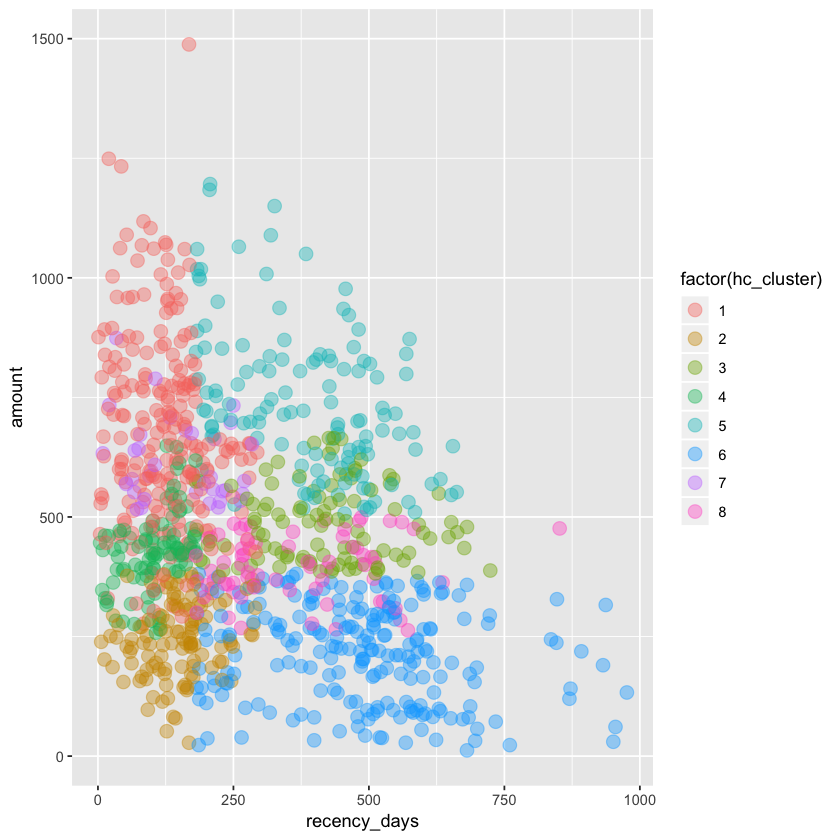

In [19]:
# Clustering Analysis (Monetary vs Recency)
ggplot(rfm_result2, aes(recency_days, amount, color = factor(hc_cluster))) +
  geom_point(alpha = 0.4, size = 3.5)

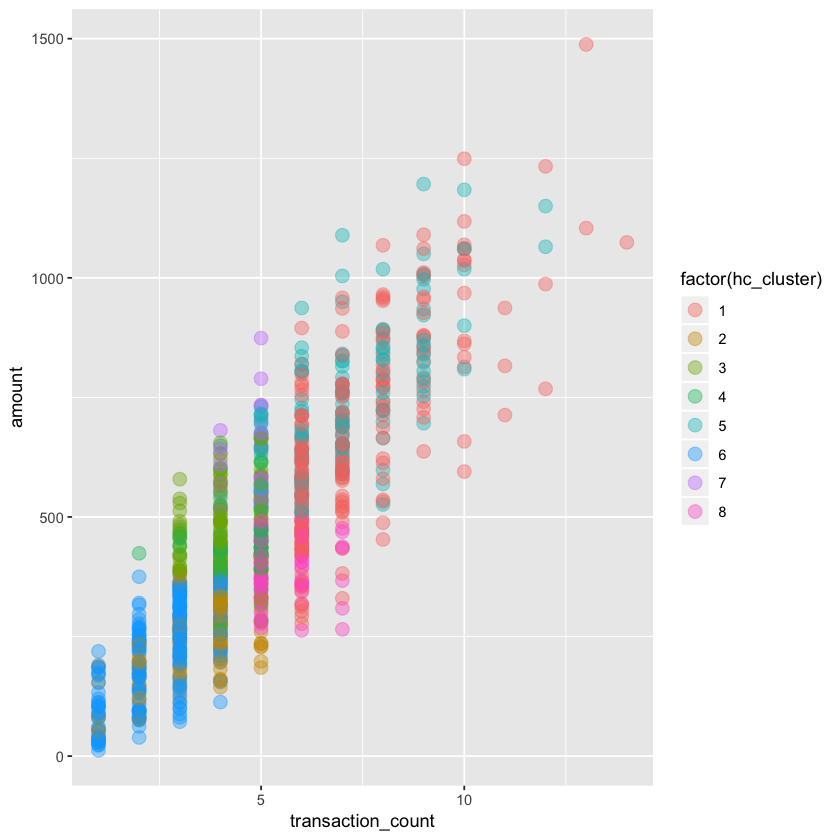

In [20]:
# Clutsering Analaysis (Monetary vs Frequency)
ggplot(rfm_result2, aes(transaction_count, amount, color = factor(hc_cluster))) +
  geom_point(alpha = 0.4, size = 3.5)

In [21]:
## Kmeans ##
set.seed(123)
rfm_result2_scale <- scale(rfm_result2[,-c(1:5)])
kmeans_cluster <- kmeans(rfm_result2_scale, 8)
head(kmeans_cluster$cluster)

[1] 6 2 5 2 8 8

In [22]:
# summarise the result
aggregate(rfm_result2_scale, by = list(kmeans_cluster$cluster), mean)

Group.1,recency_score,frequency_score,monetary_score,rfm_score
1,-1.4181325,-0.01484982,0.1596478,-1.3644090
2,1.0555844,-0.51671922,-0.5910531,0.9610653
3,-0.3879505,-1.18627483,-1.1643554,-0.4968451
4,-0.8573988,0.85868849,0.9627045,-0.7344060
5,-0.3357658,-0.26286061,-0.2571939,-0.3504466
6,0.3746753,1.00631539,0.9941272,0.4653894
7,-1.4181325,-1.17456058,-1.1119148,-1.4864795
8,1.4110241,1.10941193,0.9777164,1.4721791


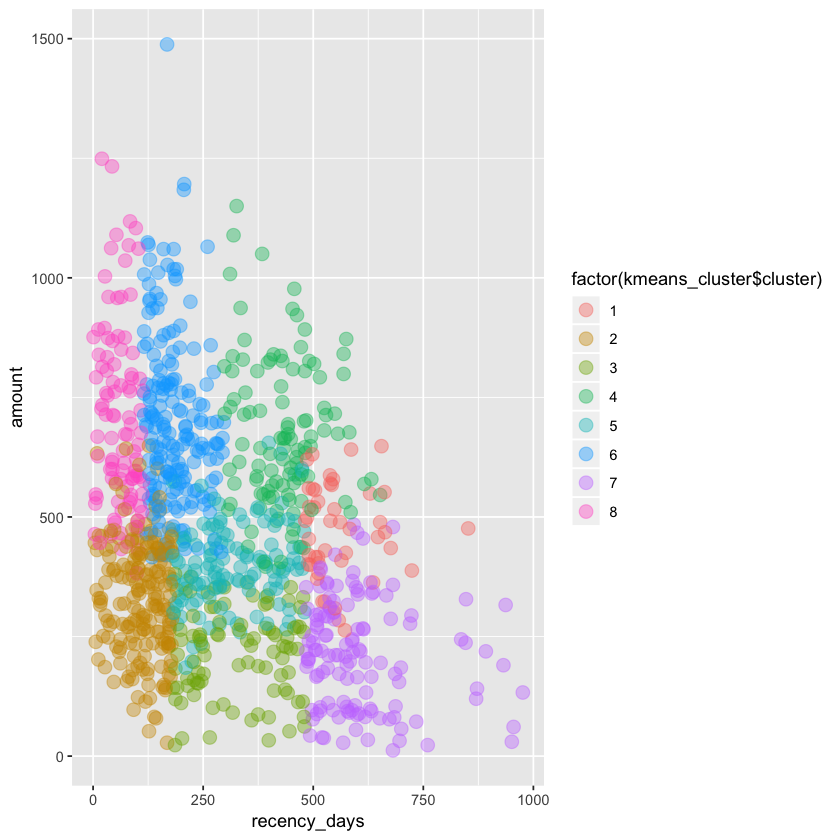

In [23]:
# Clustering Analysis II (Monetary vs Recency)
ggplot(rfm_result2, aes(recency_days, amount, color = factor(kmeans_cluster$cluster))) +
  geom_point(alpha = 0.4, size = 3.5)

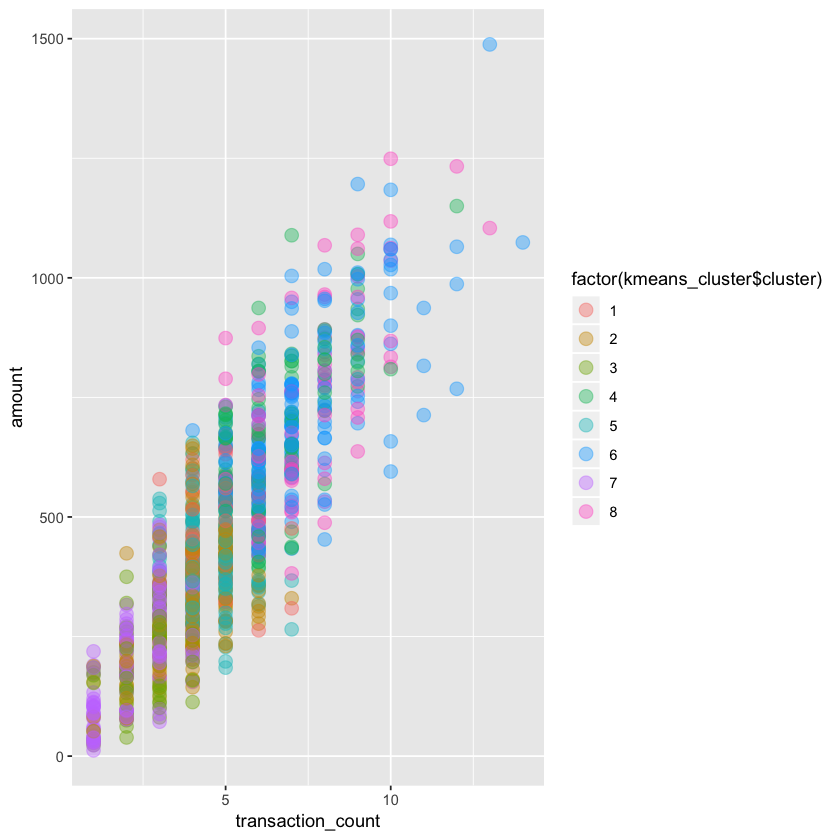

In [24]:
# Clutsering Analaysis II (Monetary vs Frequency)
ggplot(rfm_result2, aes(transaction_count, amount, color = factor(kmeans_cluster$cluster))) +
  geom_point(alpha = 0.4, size = 3.5)

In [25]:
# Optimal Number of Cluster for this data (Elbow Method)
set.seed(123)
k.max <- 10
data <- rfm_result2_scale
wss <- sapply(1:k.max, function(k) {
  kmeans(rfm_result2_scale, k, nstart = 50, iter.max = 10)$tot.withinss
})
wss

[1] 3976.0000 2197.0074 1508.6514 1011.5158  867.0813  741.2131  641.4550
 [8]  581.7526  532.9623  502.3627

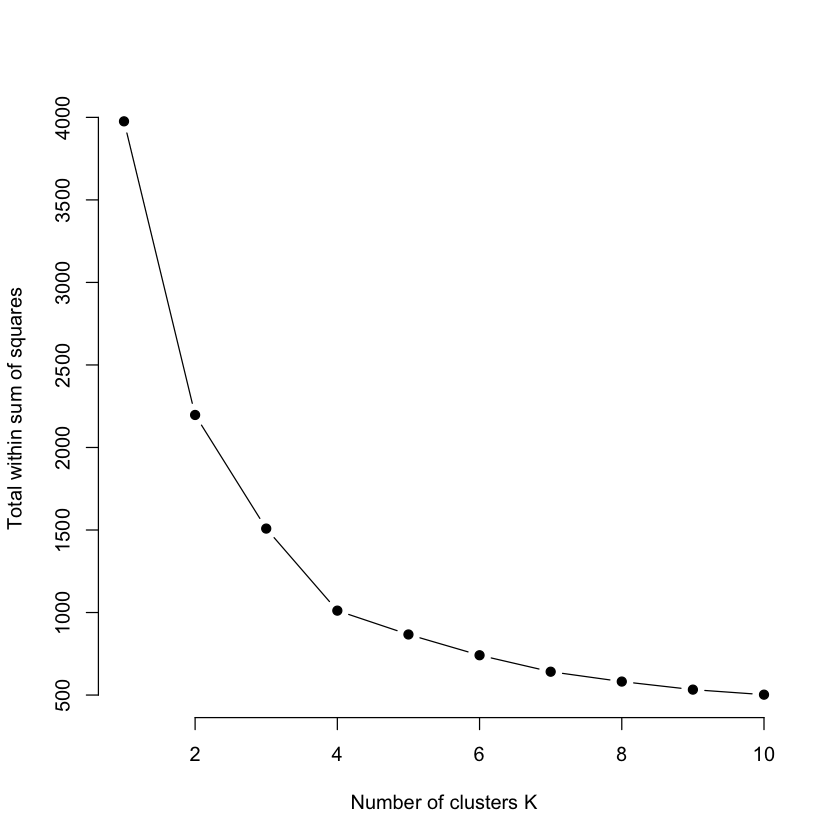

In [26]:
# 1:k.max means clusters from 1 to 10
# 'wss' defines the position for each point at each cluster
# Type = 'b' means points joined by lines
# 'pch' means plotting symbol, each numebr defines different point symbol
plot(1:k.max, wss, type = 'b', pch = 19, frame.plot = FALSE, xlab = "Number of clusters K", ylab = "Total within sum of squares")
# optimal number of cluster should be 5 since the line start moving moothing at clutser '5'

In [ ]:
install.packages("factoextra")

also installing the dependencies ‘zip’, ‘modeltools’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘mvtnorm’, ‘trimcluster’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘fpc’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’

Warning message in install.packages("factoextra"):
“installation of package ‘zip’ had non-zero exit status”Warning message in install.packages("factoextra"):
“installation of package ‘nloptr’ had non-zero exit status”

In [ ]:
library(factoextra)

In [ ]:
# Elbow Method (Total within sum of square)
fviz_nbclust(rfm_result2_scale, FUN = kmeans, method = 'wss', k.max = 10, verbose = FALSE, print.summary = TRUE) +
labs(subtitle = "Elbow Method")
# Silhouette Method (Average Silhouette, distance between each clusters)
fviz_nbclust(rfm_result2_scale, FUN = kmeans, method = 'silhouette', k.max = 10, verbose = FALSE, print.summary = TRUE) +
labs(subtitle = "Silhouette Method")
# Gap Statistic (Total intracluster variation)
set.seed(123)
fviz_nbclust(rfm_result2_scale, FUN = kmeans, nstart = 25, method = "gap_stat", k.max = 10, nboot = 50, verbose = FALSE, print.summary = TRUE) +
labs(subtitle = "Gap Statistic Method")

In [ ]:
hc_cluster

In [ ]:
head(rfm_result$rfm)

In [ ]:
rfm = rfm_result$rfm
rfm$group = hc_cluster
head(rfm)

In [ ]:
# data partition to train and test dataset
library(caret)
intrain <- createDataPartition(rfm$group, p =0.7, list= FALSE)
set.seed(2018)
training <- rfm[intrain,]
testing <- rfm[-intrain,]
dim(training);dim(testing)


In [ ]:
# Fit decision tree model
library(rpart)
attach(rfm)
decision_tree <- rpart(group ~  recency_score + frequency_score + monetary_score)
decision_tree

In [ ]:
library(rpart.plot)
rpart.plot(decision_tree)